In [238]:
import tensorflow as tf
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.model_selection import KFold
np.random.seed(404)

In [ ]:
time_window_size =5000

In [80]:
#------------------------------
time_window_size =5000
def tf_data_generator(file_list, batch_size = 20):
    i = 0
    N_FEATURES = 1
#     segments = []
#     labels = []
    time_steps = 5000
    step = time_steps
    label_name = 'Action'
    label_classes = ['EEG Fp1','Action']
    while True:
        if i*batch_size >= len(file_list):  
            i = 0
            np.random.shuffle(file_list)
        else:
            file_chunk = file_list[i*batch_size:(i+1)*batch_size] 
            data = []
            
            segments = []
            labels = []
            for file in file_chunk:
                df = pd.read_csv(open(file,'r'),usecols=label_classes)
#                 print(i,"----",file)
##                plt.figure(figsize = (12,5))
##                plt.plot(df[label_classes[0]])
##                plt.show()
                for ii in range(0, len(df) - time_steps, step):
                    xs = df['EEG Fp1'].values[ii: ii + time_steps]
                    label = stats.mode(df[label_name][ii: ii + time_steps])[0][0]#df[label_name][0]#
                    segments.append(xs)
                    labels.append(label)
#                     print(xs)
#                     print('------')
#                     print(int(ii/time_steps),label)
#                     print('******')
            data = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)#np.asarray(data)#.reshape(-1,32,32,1)
#             labels = [yo for yo in labels]
            label = np.asarray(labels)
##            print(i,"----",data[-1].shape)
            yield data, label
            i = i + 1
#            print(i)
##        if len(file_list)==i:
##            break

In [51]:
# # collecting the data
# path  = "eeg_csv/*"
# files = glob.glob(path)
# check_data = tf_data_generator(files, batch_size = 5)
# num = 0
# plt.figure(figsize=[12,5])
# for data, labels in check_data:
# #     print(data.shape, labels.shape)
# #     print(labels, "<--Labels")
# #     print()
#     plt.plot(labels)
#     num = num + 1
#     if num > 2: break
# #     for ii in data:
# #         print(ii.shape)
# plt.show()

In [83]:
path = "eeg_csv/*"
files =  glob.glob(path)
train, test = train_test_split(files, test_size = 20, random_state = 5)
test, val = train_test_split(test, test_size = 10, random_state = 1)
np.random.shuffle(train)
print("Number of Total files: ",len(files))
print("Number of train_files:" ,len(train))
print("Number of validation_files:" ,len(val))
print("Number of test_files:" ,len(test))
##
batch_size = 1
train_dataset = tf.data.Dataset.from_generator(tf_data_generator, args = [train, batch_size],output_types = (tf.float32, tf.float32), 
                                             output_shapes = ((None, 5000,1),(None,)))


validation_dataset = tf.data.Dataset.from_generator(tf_data_generator, args = [val, batch_size],output_types = (tf.float32, tf.float32),
                                                  output_shapes = ((None, 5000,1),(None,)))


test_dataset = tf.data.Dataset.from_generator(tf_data_generator, args = [test, batch_size],output_types = (tf.float32, tf.float32),
                                            output_shapes = ((None,5000,1),(None,)))


Number of Total files:  72
Number of train_files: 52
Number of validation_files: 10
Number of test_files: 10


In [138]:
path = "eeg_csv/*"
files =  glob.glob(path)
train, test = train_test_split(files, test_size = 20)
# test, val = train_test_split(test, test_size = 10)
print("Number of Total files: ",len(files))
print("Number of train_files:" ,len(train))
# print("Number of validation_files:" ,len(val))
print("Number of test_files:" ,len(test))

Number of Total files:  72
Number of train_files: 52
Number of test_files: 20


In [206]:
noFiles = 2#len(files)#20
train = files[:noFiles]

In [246]:
label_classes = ['EEG Fp1','Action']

df.head()
time_steps = 5000
step = 5000
segments = []
labels = []
N_FEATURES = 1
for jj in range(noFiles):
    print(jj,train[jj])
    df = pd.read_csv(train[jj],usecols=label_classes)
    for ii in range(0, len(df) - time_steps, step):
            xs = df['EEG Fp1'].values[ii: ii + time_steps]
            label = stats.mode(df[label_classes[1]][ii: ii + time_steps])[0][0]
            segments.append(xs)
            labels.append(label)
#             print(ii)
data = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
label = np.asarray(labels)

0 eeg_csv\Subject00_1.csv
1 eeg_csv\Subject00_2.csv
2 eeg_csv\Subject01_1.csv
3 eeg_csv\Subject01_2.csv
4 eeg_csv\Subject02_1.csv
5 eeg_csv\Subject02_2.csv
6 eeg_csv\Subject03_1.csv
7 eeg_csv\Subject03_2.csv
8 eeg_csv\Subject04_1.csv
9 eeg_csv\Subject04_2.csv
10 eeg_csv\Subject05_1.csv
11 eeg_csv\Subject05_2.csv
12 eeg_csv\Subject06_1.csv
13 eeg_csv\Subject06_2.csv
14 eeg_csv\Subject07_1.csv
15 eeg_csv\Subject07_2.csv
16 eeg_csv\Subject08_1.csv
17 eeg_csv\Subject08_2.csv
18 eeg_csv\Subject09_1.csv
19 eeg_csv\Subject09_2.csv
20 eeg_csv\Subject10_1.csv
21 eeg_csv\Subject10_2.csv
22 eeg_csv\Subject11_1.csv
23 eeg_csv\Subject11_2.csv
24 eeg_csv\Subject12_1.csv
25 eeg_csv\Subject12_2.csv
26 eeg_csv\Subject13_1.csv
27 eeg_csv\Subject13_2.csv
28 eeg_csv\Subject14_1.csv
29 eeg_csv\Subject14_2.csv
30 eeg_csv\Subject15_1.csv
31 eeg_csv\Subject15_2.csv
32 eeg_csv\Subject16_1.csv
33 eeg_csv\Subject16_2.csv
34 eeg_csv\Subject17_1.csv
35 eeg_csv\Subject17_2.csv
36 eeg_csv\Subject18_1.csv
37 eeg_csv\

In [247]:
xTrain,xTest,yTrain,yTest=train_test_split(data,label,test_size = .10, random_state = 5)

In [248]:
xTrain.shape,yTrain.shape,xTest.shape,yTest.shape

((765, 5000, 1), (765,), (86, 5000, 1), (86,))

In [249]:
xVal,xTest,yVal,yTest=train_test_split(xTest,yTest,test_size = .50, random_state = 5)

In [250]:
xVal.shape,xTest.shape,yVal.shape,yTest.shape

((43, 5000, 1), (43, 5000, 1), (43,), (43,))

In [251]:
yTest

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [236]:
# path = "eeg_csv/*"
# files =  glob.glob(path)
# train, test = train_test_split(files, test_size = 20, random_state = 5)
# test, val = train_test_split(test, test_size = 10, random_state = 1)
# np.random.shuffle(train)



##

model = Sequential(name='EEG')
model.add(Input(shape=(time_window_size,1),name='Input'))
model.add(Conv1D(filters=16,kernel_size=5,activation='relu',input_shape = (time_window_size,1),name='Layer1'))
model.add(Conv1D(filters=32,kernel_size=5,activation='relu',name='Layer2'))
model.add(MaxPooling1D(pool_size=2,strides=2,name='Maxpool1d'))
model.add(Flatten(name='Flatten'))
model.add(Dropout(0.25,name='Dropout'))
model.add(Dense(1,activation='sigmoid',name='Output'))#2, activation = 'softmax'sigmoid
model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

Model: "EEG"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Conv1D)              (None, 4996, 16)          96        
_________________________________________________________________
Layer2 (Conv1D)              (None, 4992, 32)          2592      
_________________________________________________________________
Maxpool1d (MaxPooling1D)     (None, 2496, 32)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 79872)             0         
_________________________________________________________________
Dropout (Dropout)            (None, 79872)             0         
_________________________________________________________________
Output (Dense)               (None, 1)                 79873     
Total params: 82,561
Trainable params: 82,561
Non-trainable params: 0
___________________________________________________________

In [237]:
##
####tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")
####os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
####run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)
# optimizer = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])#, options = run_opts)tf.keras.losses.BinaryCrossentropy()

# steps_per_epoch = int(np.ceil(len(train)/batch_size))
# validation_steps = int(np.ceil(len(val)/batch_size))
# steps = int(np.ceil(len(test)/batch_size))
# print("steps_per_epoch = ", steps_per_epoch)
# print("validation_steps = ", validation_steps)
# print("steps = ", steps)

In [219]:
history = model.fit(train_dataset, validation_data = validation_dataset,#batch_size=batch_size,
                   steps_per_epoch = steps_per_epoch,
                   validation_steps = validation_steps,
                   epochs = 20,verbose=1
                   )

Epoch 1/20
10/52 [====>.........................] - ETA: 20s - loss: 0.6932 - accuracy: 0.2000

KeyboardInterrupt: 

In [110]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = 10)
print("Test loss: ", test_loss)
print("Test accuracy:", test_accuracy)
##
##
##

10/10 [==============================] - 4s 360ms/step - loss: 0.6931 - accuracy: 0.8750
Test loss:  0.6931469440460205
Test accuracy: 0.875


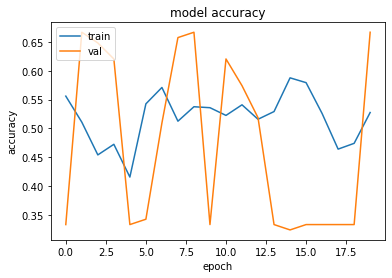

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [234]:
history = model.fit(xTrain,yTrain, validation_data = (xVal,yVal),#validation_dataset,#batch_size=batch_size,
                   #steps_per_epoch = steps_per_epoch,
                   #validation_steps = validation_steps,
                   epochs = 5,verbose=1
                   )

Epoch 1/5
224/224 [==============================] - 22s 97ms/step - loss: 11.6712 - accuracy: 0.2346 - val_loss: 11.4944 - val_accuracy: 0.2462
Epoch 2/5
224/224 [==============================] - 23s 105ms/step - loss: 11.6712 - accuracy: 0.2346 - val_loss: 11.4944 - val_accuracy: 0.2462
Epoch 3/5
224/224 [==============================] - 28s 125ms/step - loss: 11.6712 - accuracy: 0.2346 - val_loss: 11.4944 - val_accuracy: 0.2462
Epoch 4/5
203/224 [==========================>...] - ETA: 2s - loss: 11.6646 - accuracy: 0.2351

KeyboardInterrupt: 

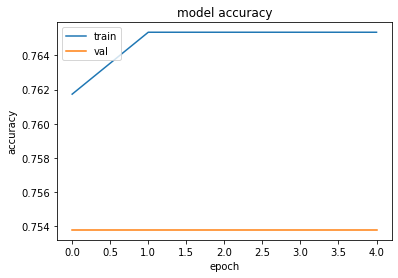

In [229]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predict = model.predict(xTest)
predict

In [ ]:
tf.math.confusion_matrix(yTest,predict)

In [169]:
yTest

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)